# Imports/prep

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

# Define file patterns
directory = '/media/datadrive/arawa/Shabaz_simulation_22_04_25/figure_7_ak/exploration_data'

patterns_my = [
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_2cells_r*.csv'), '2 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_5cells_r*.csv'), '5 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_10cells_r*.csv'), '10 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_15cells_r*.csv'), '15 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_20cells_r*.csv'), '20 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_22cells_r*.csv'), '22 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_25cells_r*.csv'), '25 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_30cells_r*.csv'), '30 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_50cells_r*.csv'), '50 cells'),
]



# Main result plot

/tmp/ipykernel_3026285/4278061637.py:10: RuntimeWarning: overflow encountered in power
  return a * x**b
/tmp/ipykernel_3026285/4278061637.py:130: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(power_law, x_data, y_data)


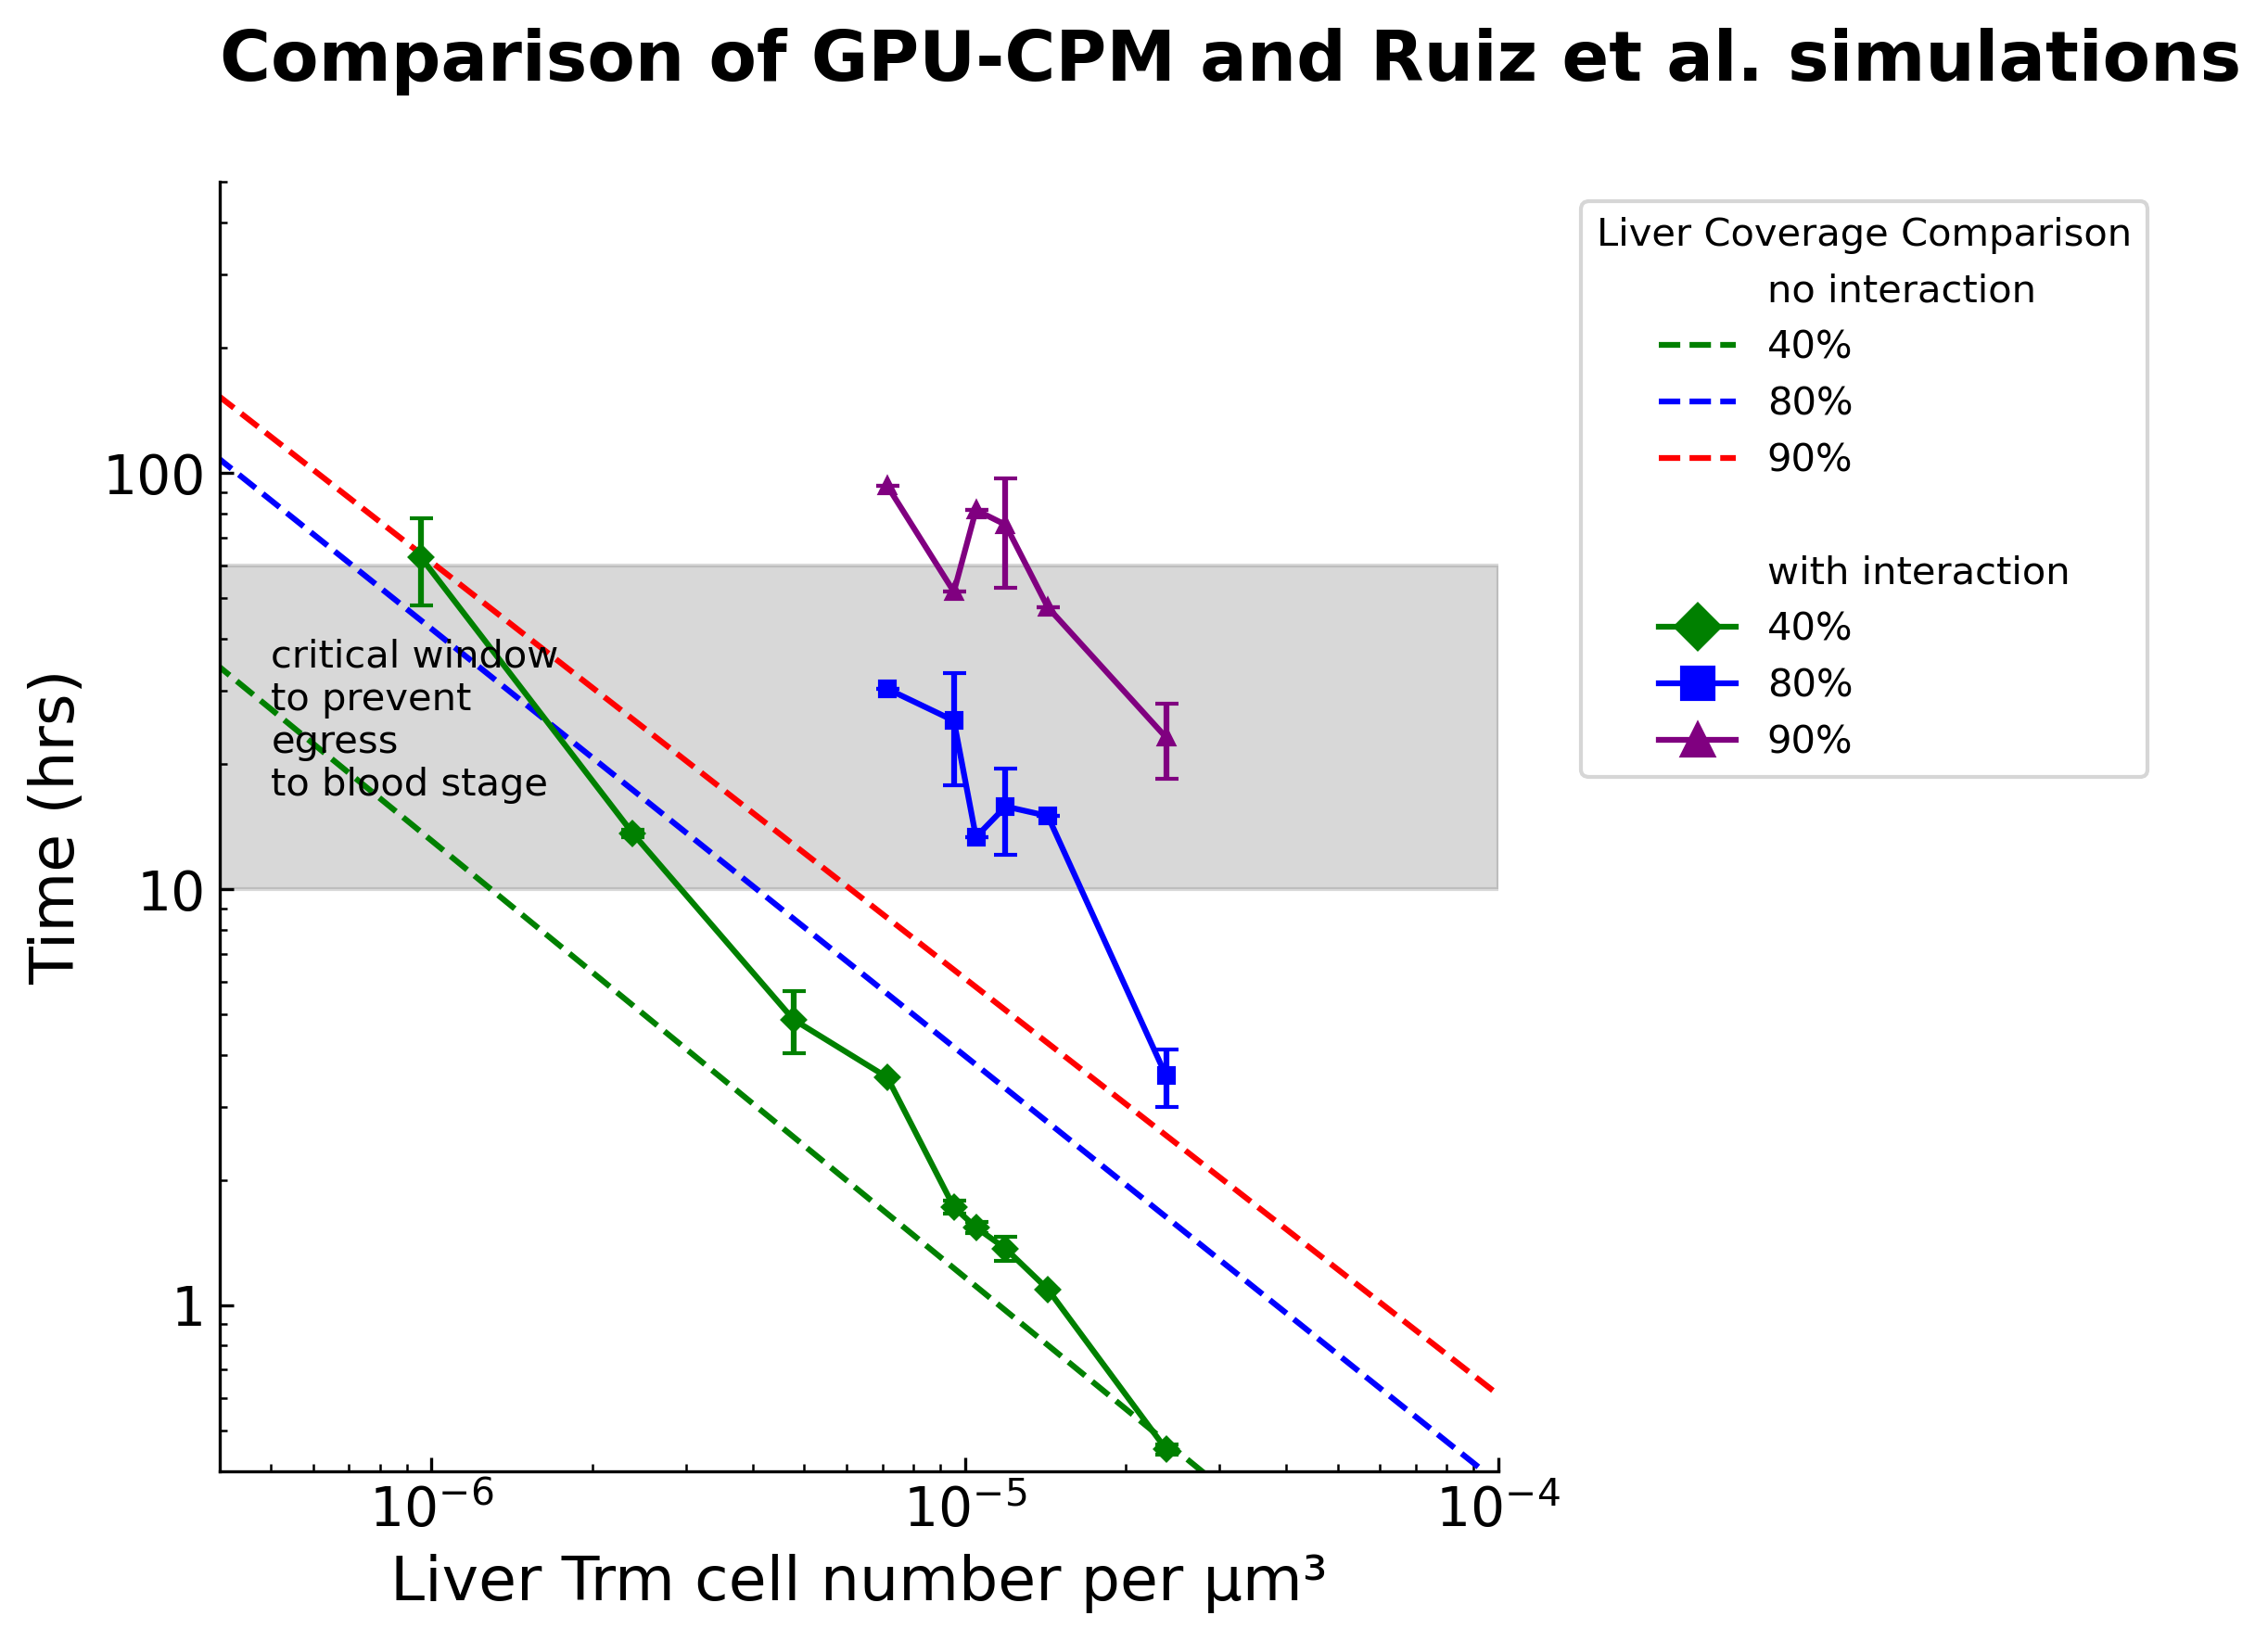

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit

# Fit function for power-law or exponential (you can adjust based on the data trend)
def power_law(x, a, b):
    return a * x**b

# Function to get the coverage data
def get_coverage_data(patterns, coverage_thresholds):
    volume_um3 = 128 * 128 * 128  # Total volume in cubic microns
    total_cells = [2, 5, 10, 15, 20, 22, 25, 30, 50]  # Total cells in simulation
    densities = [n/volume_um3 for n in total_cells]  # Cells per cubic micron
    
    # Simulation time parameters
    real_simulation_hours = 100
    real_simulation_minutes = real_simulation_hours * 60
    n_timepoints = 60000
    time_interval = real_simulation_minutes / n_timepoints  # minutes per timestep
    
    # Dictionary to store results for each coverage threshold
    results = {threshold: {'times': [], 'errors': []} for threshold in coverage_thresholds}
    
    for pattern, _ in patterns:
        files = glob.glob(pattern)
        
        # Initialize lists for each threshold
        threshold_data = {threshold: [] for threshold in coverage_thresholds}
        
        for f in files:
            try:
                df = pd.read_csv(f)
                for threshold in coverage_thresholds:
                    crossed = df[df['Fraction_Explored'] >= threshold/100]
                    if not crossed.empty:
                        tp = crossed.iloc[0]['Timepoint']
                        hours = (tp * time_interval) / 60
                        threshold_data[threshold].append(hours)
            except Exception as e:
                print(f"Error processing {f}: {e}")
                continue
        
        # Store mean and std for each threshold
        for threshold in coverage_thresholds:
            if threshold_data[threshold]:
                results[threshold]['times'].append(np.mean(threshold_data[threshold]))
                results[threshold]['errors'].append(np.std(threshold_data[threshold]))
            else:
                results[threshold]['times'].append(np.nan)
                results[threshold]['errors'].append(np.nan)
    
    return densities, results

# Get data for multiple coverage thresholds
coverage_thresholds = [40, 80, 90]
densities, coverage_results = get_coverage_data(patterns_my, coverage_thresholds)

# Conversion factor: 1 cm³ = 1e12 µm³
conversion_factor = 1e12

# Define reference data points - converted to per cubic micron
x_100 = np.array([6.1054e+5, 1.2249e+7]) / conversion_factor
y_100 = np.array([1000, 40])

x_99 = np.array([6.1054e+5, 4.0693e+6]) / conversion_factor
y_99 = np.array([235, 31])

x_98 = np.array([6.1054e+5, 4.0693e+6]) / conversion_factor
y_98 = np.array([190, 25])

x_95 = np.array([6.1054e+5, 4.0693e+6]) / conversion_factor
y_95 = np.array([134.10, 20])

x_90 = np.array([6.1054e+5, 4.0693e+6]) / conversion_factor
y_90 = np.array([100, 15])

x_85 = np.array([6.1054e+5, 4.0693e+6]) / conversion_factor
y_85 = np.array([82.90, 12.19])

x_80 = np.array([6.1054e+5, 4.0693e+6]) / conversion_factor
y_80 = np.array([70, 10])

x_40 = np.array([6.1054e+5, 4.0693e+6]) / conversion_factor
y_40 = np.array([21.9443, 3])

# Plot setup
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['black'])
fig, ax = plt.subplots(figsize=(8, 6))

# Shaded area for critical window
ax.axhspan(10, 60, color='gray', alpha=0.3)
ax.text(5e-7, 40, 'critical window\nto prevent\negress\nto blood stage',
        fontsize=10, va='top', ha='left')

# Plot reference data
# ax.plot(x_40, y_40, 'v-', color='gray', label='40%', markersize=4)
# ax.plot(x_80, y_80, 's-', color='gray', label='80%', markersize=4)
# #ax.plot(x_85, y_85, 'o-', color='gray', label='85%', markersize=4)
# ax.plot(x_90, y_90, 'd-', color='gray', label='90%', markersize=4) 
# ax.plot(x_95, y_95, 'o-', color='gray', label='95%', markersize=4)


# Plot simulation data for each coverage threshold
colors = ['green', 'blue', 'purple', 'red', 'orange', 'brown', 'pink', 'gray', 'black']
markers = ['D', 's', '^', 'o', 'v', 'x', 'p', 'h', 'D']

for i, threshold in enumerate(coverage_thresholds):
    y = np.array(coverage_results[threshold]['times'])
    yerr = np.array(coverage_results[threshold]['errors'])
    x = np.array(densities)

    # Only keep non-NaN points for plotting lines
    mask = ~np.isnan(y)

    ax.errorbar(x[mask],
                y[mask],
                yerr=yerr[mask],
                fmt=markers[i] + '-',  # still draws line
                color=colors[i],
                capsize=3,
                markersize=4,
                label=f'{threshold}% (simulation)')


# Fit and plot no-interaction dashed lines
def fit_and_plot_no_interaction(x_data, y_data, color, label):
    popt, _ = curve_fit(power_law, x_data, y_data)
    
    # Create a wider x range for the fit (both before and after the original data range)
    x_fit = np.logspace(np.log10(min(x_data)/10), np.log10(max(x_data)*30), 100) # generate a wider log-spaced x range
    y_fit = power_law(x_fit, *popt)
    
    # Plot the dashed line for no-interaction
    ax.plot(x_fit, y_fit, '--', color=color, label=f'No interaction {label}%')

# Fit and plot for each coverage percentage for no-interaction lines
fit_and_plot_no_interaction(x_40, y_40, 'green', '40')
fit_and_plot_no_interaction(x_80, y_80, 'blue', '80')
#fit_and_plot_no_interaction(x_85, y_85, 'blue', '85')
fit_and_plot_no_interaction(x_90, y_90, 'red', '90')
#fit_and_plot_no_interaction(x_95, y_95, 'red', '95')

# Custom legend with grouped titles
legend_elements = [
    Line2D([0], [0], marker='', color='none', label='no interaction'),
    Line2D([0], [0], linestyle='--', color='green', markersize=8, label='40%'),
    Line2D([0], [0], linestyle='--', color='blue', markersize=8, label='80%'),
    # Line2D([0], [0], linestyle='--', color='blue', markersize=8, label='85%'),
    Line2D([0], [0], linestyle='--', color='red', markersize=8, label='90%'),
    #Line2D([0], [0], linestyle='--', color='red', markersize=8, label='95%'),
    Line2D([0], [0], marker='', color='none', label=''),
    Line2D([0], [0], marker='', color='none', label='with interaction'),
    *[Line2D([0], [0], marker=markers[i], color=colors[i], linestyle='-', markersize=8, label=f'{threshold}%') for i, threshold in enumerate(coverage_thresholds)]
]

# Log-log scale and labels
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Liver Trm cell number per μm³', fontsize=16)
ax.set_ylabel('Time (hrs)', fontsize=16)
# set tick labels to size 14
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Comparison of GPU-CPM and Ruiz et al. simulations\n', loc='left', fontsize=18, fontweight='bold')

# Final formatting
ax.legend(handles=legend_elements, title='Liver Coverage Comparison', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlim(4e-7, 1e-4)
ax.set_ylim(0.4, 500)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.gcf().set_dpi(300)
#remove top and right spines as well as ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#remove top and right ticks
ax.tick_params(axis='both', which='both', direction='in', top=False, right=False)
plt.tight_layout()
plt.show()


# Comparsions - relative vs absolute differences

In [3]:
ref_data = {
    40: (y_40, x_40),
    80: (y_80, x_80),
    90: (y_90, x_90),
    # 95: (y_95, x_95),
}
diffs = {}

for thr in coverage_thresholds:
    y_ref, x_vals = ref_data[thr]
    # Interpolate reference times to match simulation densities
    t_ref_at_sim = np.interp(densities, x_vals, y_ref)  # shape matches sim density array
    t_sim = np.array(coverage_results[thr]['times'])

    abs_diff = t_ref_at_sim - t_sim
    rel_diff = abs_diff / t_ref_at_sim * 100  # relative difference (%)

    diffs[thr] = {
        'abs_diff': abs_diff,
        'rel_diff': rel_diff,
        'mean_abs_diff': np.nanmean(abs_diff),
        'mean_rel_diff': np.nanmean(rel_diff),
    }

for thr, stats in diffs.items():
    print(f"--- {thr}% coverage ---")
    print(f"Mean absolute difference: {stats['mean_abs_diff']:.1f} hrs")
    print(f"Mean relative difference: {stats['mean_rel_diff']:.1f}%\n")


--- 40% coverage ---
Mean absolute difference: -4.2 hrs
Mean relative difference: -1.1%

--- 80% coverage ---
Mean absolute difference: -7.2 hrs
Mean relative difference: -72.3%

--- 90% coverage ---
Mean absolute difference: -47.0 hrs
Mean relative difference: -313.6%



## Relative

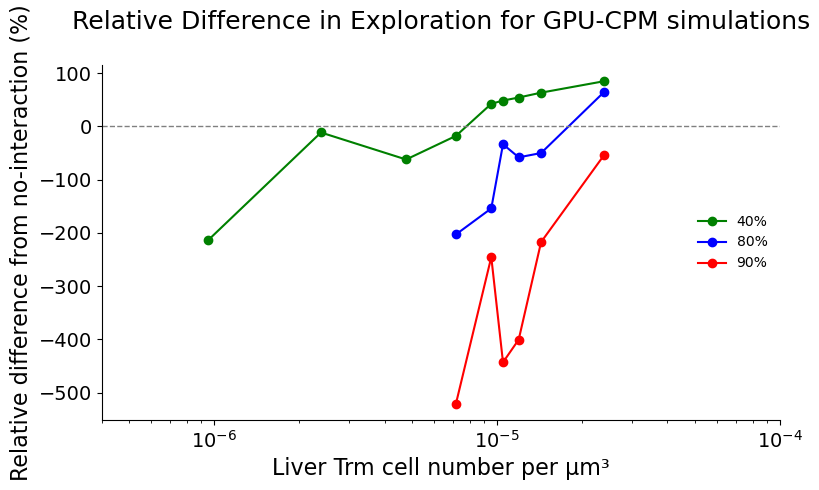

In [4]:
colors = ['green', 'blue', 'red']

fig, ax = plt.subplots(figsize=(8, 5))
line_handles = []

for i, thr in enumerate(coverage_thresholds):
    rel_diff = np.array(diffs[thr]['rel_diff'], dtype=float)
    dens_array = np.array(densities, dtype=float)

    # Filter out NaNs to connect only valid points
    valid_mask = ~np.isnan(rel_diff)
    rel_diff_valid = rel_diff[valid_mask]
    dens_valid = dens_array[valid_mask]

    color = colors[i % len(colors)]
    line, = ax.plot(dens_valid, rel_diff_valid, label=f'{thr}%', marker='o', color=color)
    line_handles.append(line)

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_xscale('log')
ax.set_xlabel('Liver Trm cell number per μm³', fontsize=16)
ax.set_ylabel('Relative difference from no-interaction (%)', fontsize=16)
# set tick labels to size 14
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Relative Difference in Exploration for GPU-CPM simulations\n', fontsize=18)

ax.legend(handles=line_handles, title='Coverage Threshold', loc='upper left')
# remove legend box
ax.legend(frameon=False, loc='center right')
plt.tight_layout()
#remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(4e-7, 1e-4)
plt.show()

## Absolute

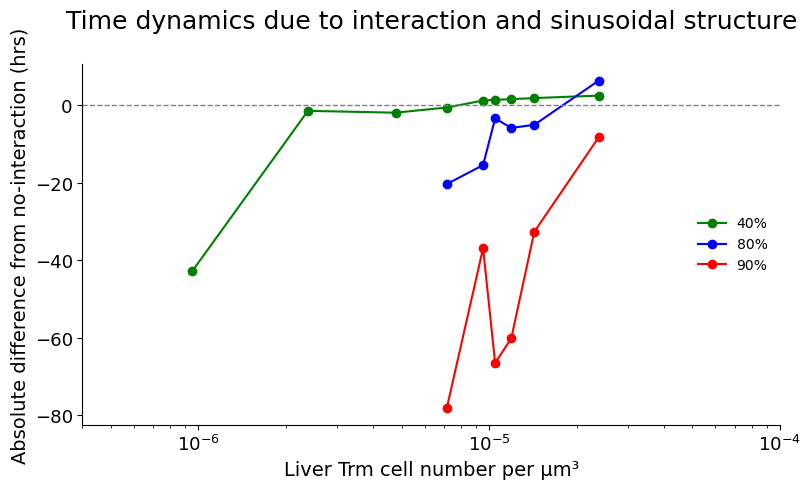

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
line_handles = []

for i, thr in enumerate(coverage_thresholds):
    abs_diff = np.array(diffs[thr]['abs_diff'], dtype=float)
    dens_array = np.array(densities, dtype=float)

    # Filter out NaNs to connect only valid points
    valid_mask = ~np.isnan(abs_diff)
    abs_diff_valid = abs_diff[valid_mask]
    dens_valid = dens_array[valid_mask]

    color = colors[i % len(colors)]
    line, = ax.plot(dens_valid, abs_diff_valid, label=f'{thr}%', marker='o', color=color)
    line_handles.append(line)

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_xscale('log')
ax.set_xlabel('Liver Trm cell number per μm³', fontsize=14)
ax.set_ylabel('Absolute difference from no-interaction (hrs)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Time dynamics due to interaction and sinusoidal structure\n', fontsize=18)

ax.legend(handles=line_handles, title='Coverage Threshold')
# remove legend box  
ax.legend(frameon=False, loc='center right')

plt.tight_layout()
#remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(4e-7, 1e-4)
plt.show()


# best linear fit for my data

Model Comparison:
   df_resid       ssr  df_diff  ss_diff         F   Pr(>F)
0      17.0  0.830339      0.0      NaN       NaN      NaN
1      15.0  0.657049      2.0  0.17329  1.978045  0.17281

Using additive model (same slope for all percentages)


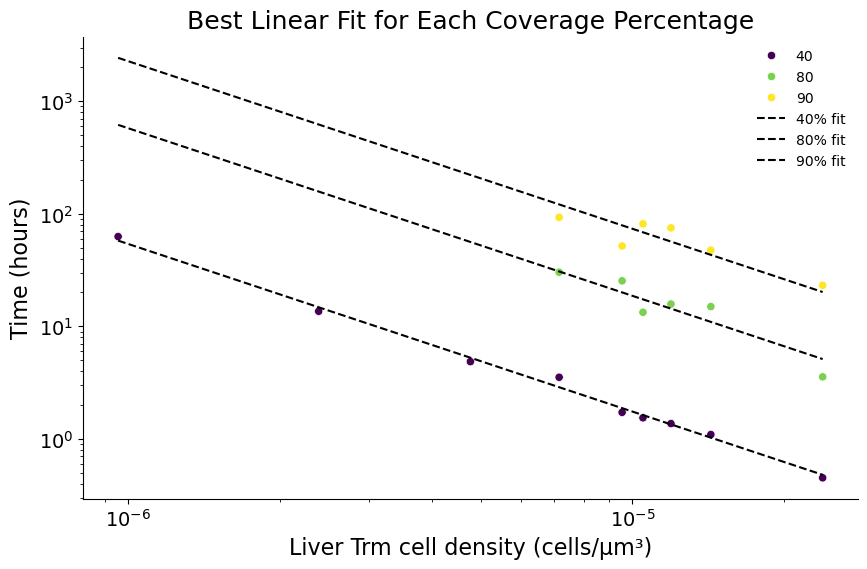

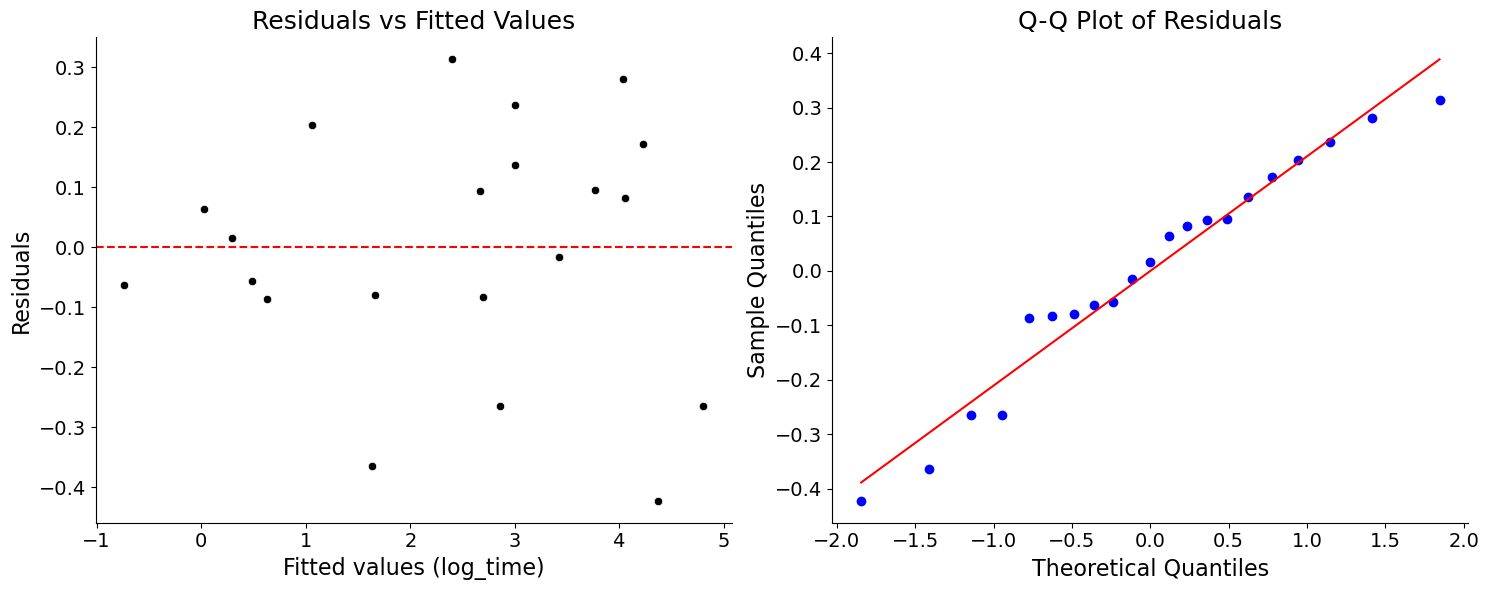


Best Model Summary:
                            OLS Regression Results                            
Dep. Variable:               log_time   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     355.0
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.59e-15
Time:                        08:50:56   Log-Likelihood:                 4.1220
No. Observations:                  21   AIC:                           -0.2439
Df Residuals:                      17   BIC:                             3.934
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept    

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Prepare and visualize the data (same as before)
data = []
for i, threshold in enumerate(coverage_thresholds):
    y = np.array(coverage_results[threshold]['times'])
    yerr = np.array(coverage_results[threshold]['errors'])
    x = np.array(densities)
    mask = ~np.isnan(y)
    for xi, yi in zip(x[mask], y[mask]):
        data.append({
            'time': yi,
            'density': xi,
            'percentage': threshold
        })

df = pd.DataFrame(data)
df["log_time"] = np.log(df["time"])
df["log_density"] = np.log(df["density"])

# 2. Fit both models and compare
# Additive model 
model_additive = smf.ols('log_time ~ log_density + C(percentage)', data=df).fit()

# Interaction model
model_interaction = smf.ols('log_time ~ C(percentage) * log_density', data=df).fit()

# Compare models
from statsmodels.stats.anova import anova_lm
model_comparison = anova_lm(model_additive, model_interaction)
print("Model Comparison:")
print(model_comparison)

# 3. Select best model based on p-value
if model_comparison.iloc[1,4] < 0.05:
    best_model = model_interaction
    print("\nUsing interaction model (different slopes for each percentage)")
else:
    best_model = model_additive
    print("\nUsing additive model (same slope for all percentages)")

# 4. Add best-fit lines to original plot
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot data points
sns.scatterplot(data=df, x="density", y="time", hue="percentage", palette="viridis", ax=ax)

# Generate predicted values for each percentage
percentages = df['percentage'].unique()
x_plot = np.logspace(np.log10(df['density'].min()), np.log10(df['density'].max()), 100)

for p in percentages:
    # Create prediction dataframe
    pred_df = pd.DataFrame({
        'density': x_plot,
        'percentage': p,
        'log_density': np.log(x_plot)
    })
    
    # Predict using best model
    pred_df['log_time_pred'] = best_model.predict(pred_df)
    pred_df['time_pred'] = np.exp(pred_df['log_time_pred'])
    
    # Plot the line
    ax.plot(pred_df['density'], pred_df['time_pred'], 
            label=f'{p}% fit', linestyle='--')

# Format plot
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Liver Trm cell density (cells/µm³)', fontsize=16)
ax.set_ylabel('Time (hours)', fontsize=16)
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Best Linear Fit for Each Coverage Percentage', fontsize=18)
ax.legend(frameon=False)
plt.show()

# 5. Check linearity assumption with residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Residuals vs fitted
sns.scatterplot(x=best_model.fittedvalues, y=best_model.resid, ax=ax1)
ax1.axhline(0, color='r', linestyle='--')
ax1.set_title('Residuals vs Fitted Values', fontsize=18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('Fitted values (log_time)' , fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_ylabel('Residuals', fontsize=16)

# Q-Q plot
#set name for x and y axes
stats.probplot(best_model.resid, plot=ax2)
#set x and y axis labels fontsize
ax2.set_xlabel('Theoretical Quantiles', fontsize=16)
ax2.set_ylabel('Sample Quantiles', fontsize=16)
ax2.set_title('Q-Q Plot of Residuals', fontsize=18)
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# 6. Final statistical summary
print("\nBest Model Summary:")
print(best_model.summary())


In [7]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

# Define models ----------------------------------------------------------------

# 1. Same slope, different intercepts
model_additive = smf.ols('log_time ~ log_density + C(percentage)', data=df).fit()

# 2. Different slopes and intercepts
model_interaction = smf.ols('log_time ~ C(percentage) * log_density', data=df).fit()

# 3. Same slope and same intercept (pooled)
model_pooled = smf.ols('log_time ~ log_density', data=df).fit()

# 4. Percentage-specific slopes
df['p80'] = (df['percentage'] == 80).astype(int)
df['p90'] = (df['percentage'] == 90).astype(int)
df['p40'] = (df['percentage'] == 40).astype(int)
model_specific_slopes = smf.ols('log_time ~ p80:log_density + p90:log_density + p40:log_density', data=df).fit()

# 5a. Shared slope but nonlinear percentage effect
df['percentage_cont'] = df['percentage']
model_nonlinear = smf.ols('log_time ~ log_density + np.log(percentage_cont)', data=df).fit()

# 5b. Quadratic effect of density
model_quadratic = smf.ols('log_time ~ log_density + I(log_density**2) + C(percentage)', data=df).fit()

models = {
    "Pooled": model_pooled,
    "Additive": model_additive,
    "Interaction": model_interaction,
    "SpecificSlopes": model_specific_slopes,
    "NonlinearPct": model_nonlinear,
    "Quadratic": model_quadratic
}

# Create comparison table ------------------------------------------------------

model_comparison = pd.DataFrame({
    "Model": list(models.keys()),
    "AIC": [m.aic for m in models.values()],
    "BIC": [m.bic for m in models.values()],
    "R²": [m.rsquared for m in models.values()]
})

model_comparison = model_comparison.sort_values("BIC").reset_index(drop=True)

# Bayes Factor from BIC approximation ------------------------------------------

def bic_to_bf(bic_values, denominator, log=False):
    """
    Convert BIC values to Bayes Factors using the approximation:
    BF_10 = exp((BIC0 - BIC1) / 2)
    """
    bic_values = np.array(bic_values)
    bf = np.exp((denominator - bic_values) / 2)
    return np.log(bf) if log else bf

# Use lowest BIC as denominator
denominator_bic = model_comparison["BIC"].min()

# Add Bayes Factor columns
model_comparison["BF"] = bic_to_bf(model_comparison["BIC"], denominator=denominator_bic)
model_comparison["log(BF)"] = bic_to_bf(model_comparison["BIC"], denominator=denominator_bic, log=True)

print(model_comparison.sort_values("BF", ascending=False))


            Model        AIC        BIC        R²            BF    log(BF)
0        Additive  -0.243908   3.934182  0.984289  1.000000e+00   0.000000
1     Interaction  -1.159485   5.107650  0.987568  5.561407e-01  -0.586734
2       Quadratic   1.741203   6.963815  0.984301  2.198485e-01  -1.514816
3  SpecificSlopes   4.855017   9.033107  0.979972  7.812365e-02  -2.549462
4    NonlinearPct  25.996679  29.130246  0.939713  3.378658e-06 -12.598032
5          Pooled  80.716697  82.805741  0.102087  7.468932e-18 -39.435780


# new plot based on best fit

/tmp/ipykernel_3026285/485523269.py:10: RuntimeWarning: overflow encountered in power
  return a * x**b
/tmp/ipykernel_3026285/485523269.py:127: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(power_law, x_data, y_data)


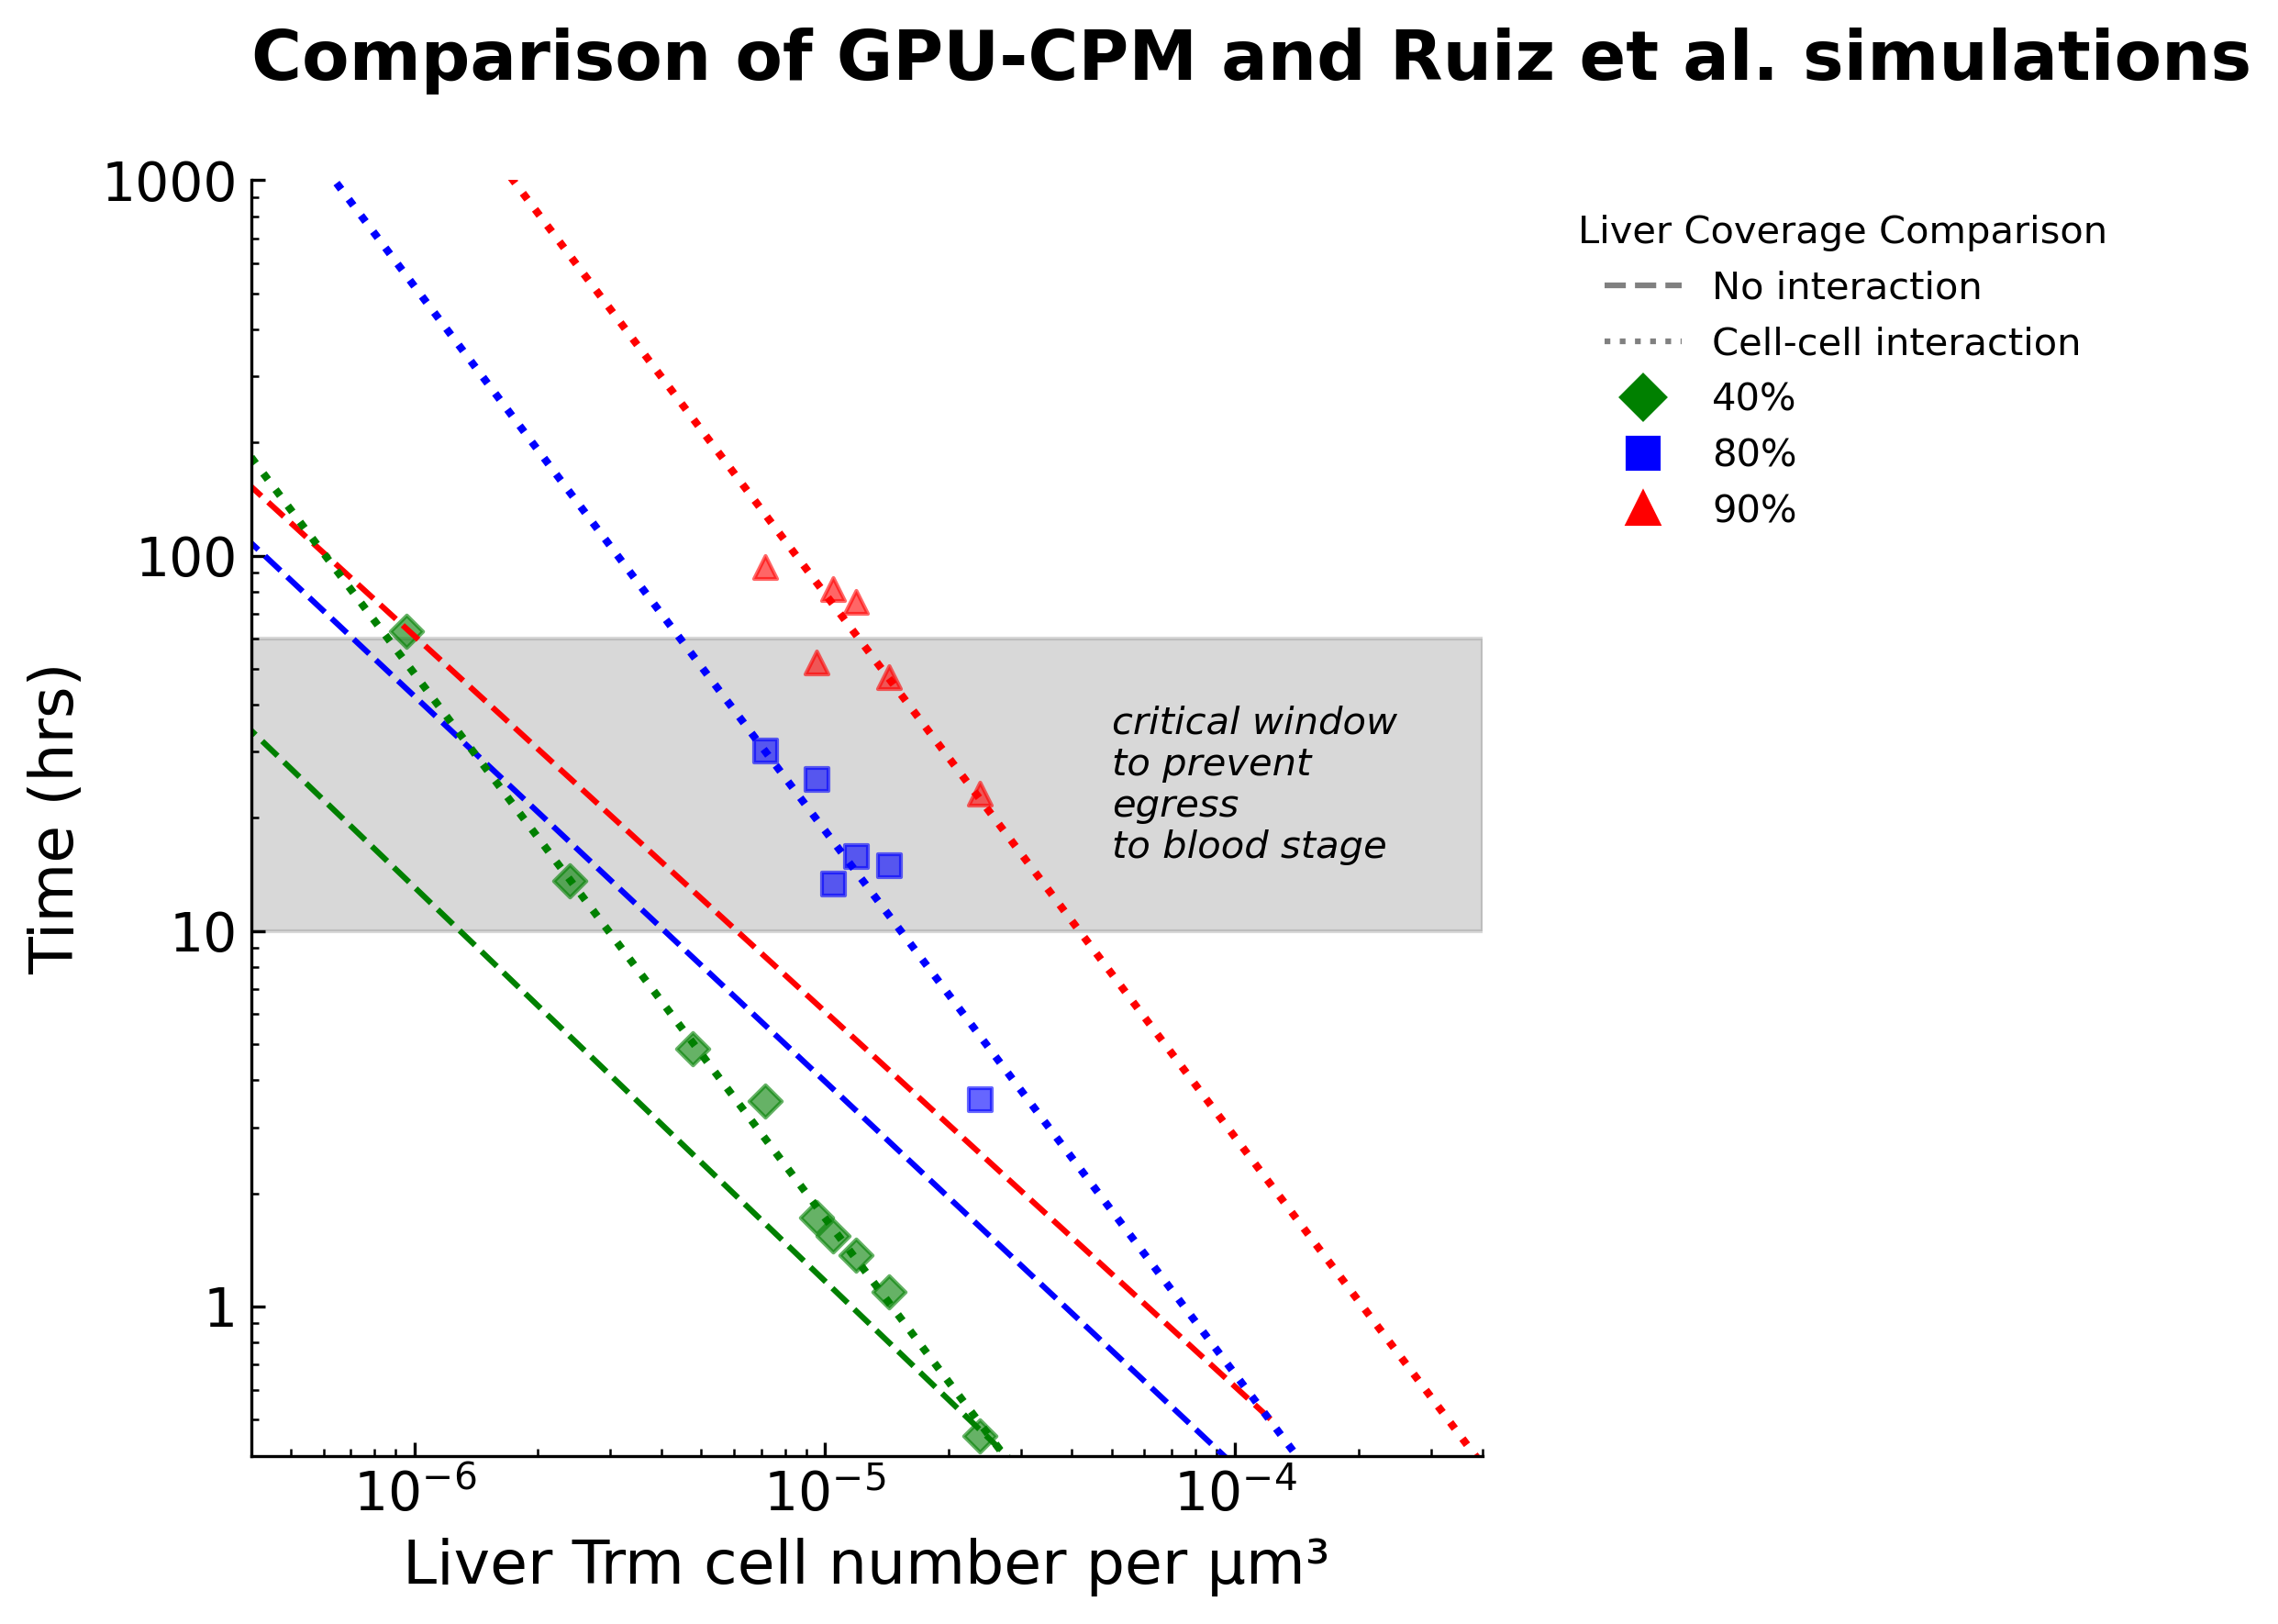

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit

# Fit function for power-law or exponential (you can adjust based on the data trend)
def power_law(x, a, b):
    return a * x**b

# Function to get the coverage data
def get_coverage_data(patterns, coverage_thresholds):
    volume_um3 = 128 * 128 * 128  # Total volume in cubic microns
    total_cells = [2, 5, 10, 15, 20, 22, 25, 30, 50]  # Total cells in simulation
    densities = [n/volume_um3 for n in total_cells]  # Cells per cubic micron
    
    # Simulation time parameters
    real_simulation_hours = 100
    real_simulation_minutes = real_simulation_hours * 60
    n_timepoints = 60000
    time_interval = real_simulation_minutes / n_timepoints  # minutes per timestep
    
    # Dictionary to store results for each coverage threshold
    results = {threshold: {'times': [], 'errors': []} for threshold in coverage_thresholds}
    
    for pattern, _ in patterns:
        files = glob.glob(pattern)
        
        # Initialize lists for each threshold
        threshold_data = {threshold: [] for threshold in coverage_thresholds}
        
        for f in files:
            try:
                df = pd.read_csv(f)
                for threshold in coverage_thresholds:
                    crossed = df[df['Fraction_Explored'] >= threshold/100]
                    if not crossed.empty:
                        tp = crossed.iloc[0]['Timepoint']
                        hours = (tp * time_interval) / 60
                        threshold_data[threshold].append(hours)
            except Exception as e:
                print(f"Error processing {f}: {e}")
                continue
        
        # Store mean and std for each threshold
        for threshold in coverage_thresholds:
            if threshold_data[threshold]:
                results[threshold]['times'].append(np.mean(threshold_data[threshold]))
                results[threshold]['errors'].append(np.std(threshold_data[threshold]))
            else:
                results[threshold]['times'].append(np.nan)
                results[threshold]['errors'].append(np.nan)
    
    return densities, results

# Get data for multiple coverage thresholds
coverage_thresholds = [40, 80, 90]
densities, coverage_results = get_coverage_data(patterns_my, coverage_thresholds)

# Conversion factor: 1 cm³ = 1e12 µm³
conversion_factor = 1e12

# # Define reference data points - converted to per cubic micron
# x_100 = np.array([6.1054e+5, 1.2249e+7]) / conversion_factor
# y_100 = np.array([1000, 40])

# x_99 = np.array([6.1054e+5, 4.0693e+6]) / conversion_factor
# y_99 = np.array([235, 31])

# x_98 = np.array([6.1054e+5, 4.0693e+6]) / conversion_factor
# y_98 = np.array([190, 25])

# x_95 = np.array([6.1054e+5, 4.0693e+6]) / conversion_factor
# y_95 = np.array([134.10, 20])

x_90 = np.array([6.1054e+5, 4.0693e+6]) / conversion_factor
y_90 = np.array([100, 15])

# x_85 = np.array([6.1054e+5, 4.0693e+6]) / conversion_factor
# y_85 = np.array([82.90, 12.19])

x_80 = np.array([6.1054e+5, 4.0693e+6]) / conversion_factor
y_80 = np.array([70, 10])

x_40 = np.array([6.1054e+5, 4.0693e+6]) / conversion_factor
y_40 = np.array([21.9443, 3])

# Plot setup
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['black'])
fig, ax = plt.subplots(figsize=(8, 6))

# Shaded area for critical window
ax.axhspan(10, 60, color='gray', alpha=0.3)
#put in cursive font
ax.text(5e-5, 40, 'critical window\nto prevent\negress\nto blood stage',
        fontsize=10, va='top', ha='left', fontstyle='italic')

# Plot simulation data for each coverage threshold
colors = ['green', 'blue', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'black']
markers = ['D', 's', '^', 'o', 'v', 'x', 'p', 'h', 'D']

for i, threshold in enumerate(coverage_thresholds):
    y = np.array(coverage_results[threshold]['times'])
    yerr = np.array(coverage_results[threshold]['errors'])
    x = np.array(densities)

    # Only keep non-NaN points for plotting lines
    mask = ~np.isnan(y)

    # ax.errorbar(x[mask],
    #             y[mask],
    #             yerr=yerr[mask],
    #             fmt=markers[i] + '-',  # still draws line
    #             color=colors[i],
    #             capsize=3,
    #             markersize=4,
    #             label=f'{threshold}% (simulation)')
    ax.scatter(x, y, 
               color=colors[i], 
               marker=markers[i],
               alpha=0.6,  # Slightly transparent
               label=f'{threshold}% (all points)')

# Fit and plot no-interaction dashed lines
def fit_and_plot_no_interaction(x_data, y_data, color, label):
    popt, _ = curve_fit(power_law, x_data, y_data)
    
    # Create a wider x range for the fit (both before and after the original data range)
    x_fit = np.logspace(np.log10(min(x_data)/10), np.log10(max(x_data)*30), 100)
    y_fit = power_law(x_fit, *popt)
    
    # Plot the dashed line for no-interaction
    ax.plot(x_fit, y_fit, '--', color=color, label=f'No interaction {label}%')

# Fit and plot for each coverage percentage for no-interaction lines
fit_and_plot_no_interaction(x_40, y_40, 'green', '40')
fit_and_plot_no_interaction(x_80, y_80, 'blue', '80')
fit_and_plot_no_interaction(x_90, y_90, 'red', '90')
# fit_and_plot_no_interaction(x_95, y_95, 'purple', '95')

# ADD BEST FIT LINES FROM ADDITIVE MODEL
# Prepare data for modeling
model_data = []
for i, threshold in enumerate(coverage_thresholds):
    y = np.array(coverage_results[threshold]['times'])
    x = np.array(densities)
    mask = ~np.isnan(y)
    for xi, yi in zip(x[mask], y[mask]):
        model_data.append({
            'time': yi,
            'density': xi,
            'percentage': threshold,
            'log_time': np.log(yi),
            'log_density': np.log(xi)
        })

df_model = pd.DataFrame(model_data)

# Fit the additive model
# Model: log_time ~ Intercept + C(percentage) + log_density
# Coefficients from summary:
intercept = -16.1411
coef_80 = 2.3762
coef_90 = 3.8291
#coef_95 = 4.9417
slope = -1.4492

# Generate prediction lines for each percentage
#x_plot = np.logspace(np.log10(min(densities)), np.log10(max(densities)), 100)
x_plot = np.logspace(np.log10(4e-7), np.log10(4e-4), 1000)


for i, threshold in enumerate(coverage_thresholds):
    # Calculate intercept for this percentage
    if threshold == 40:
        current_intercept = intercept
    elif threshold == 80:
        current_intercept = intercept + coef_80
    elif threshold == 90:
        current_intercept = intercept + coef_90
    # elif threshold == 95:
    #     current_intercept = intercept + coef_95
    
    # Calculate predicted values
    log_y_pred = current_intercept + slope * np.log(x_plot)
    y_pred = np.exp(log_y_pred)
    
    # Plot the line
    ax.plot(x_plot, y_pred, ':', color=colors[i], linewidth=2, 
            label=f'Additive model {threshold}%')

# Custom legend with grouped titles
legend_elements = [
    Line2D([0], [0], marker='', color='none', label='no interaction'),
    Line2D([0], [0], linestyle='--', color='green', markersize=8, label='40%'),
    Line2D([0], [0], linestyle='--', color='blue', markersize=8, label='80%'),
    Line2D([0], [0], linestyle='--', color='red', markersize=8, label='90%'),
    # Line2D([0], [0], linestyle='--', color='purple', markersize=8, label='95%'),
    Line2D([0], [0], marker='', color='none', label=''),
    Line2D([0], [0], marker='', color='none', label='with interaction'),
    *[Line2D([0], [0], marker=markers[i], color=colors[i], linestyle='', markersize=8, label=f'{threshold}%') for i, threshold in enumerate(coverage_thresholds)],
    Line2D([0], [0], marker='', color='none', label=''),
    Line2D([0], [0], marker='', color='none', label='additive model fit'),
    *[Line2D([0], [0], linestyle=':', color=colors[i], markersize=8, label=f'{threshold}%') for i, threshold in enumerate(coverage_thresholds)]
]

legend_elements = [
    Line2D([0], [0], linestyle='--', color='gray', markersize=8, label='No interaction'),
    Line2D([0], [0], linestyle=':', color='gray', markersize=8, label='Cell-cell interaction'),
    *[Line2D([0], [0], marker=markers[i], color=colors[i], linestyle='', markersize=8, label=f'{threshold}%') for i, threshold in enumerate(coverage_thresholds)],

]

# Log-log scale and labels
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Liver Trm cell number per μm³', fontsize=16)
ax.set_ylabel('Time (hrs)', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Comparison of GPU-CPM and Ruiz et al. simulations\n', loc='left', fontsize=18, fontweight='bold')

# Final formatting
ax.legend(handles=legend_elements, title='Liver Coverage Comparison', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlim(4e-7, 4e-4)
ax.set_ylim(0.4, 1000)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.gcf().set_dpi(300)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', top=False, right=False)
plt.tight_layout()
plt.show()

# compare two models statistically

In [12]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind, mannwhitneyu
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit function for power-law
def power_law(x, a, b):
    return a * x**b

# Function to get the coverage data from GPU-CPM simulations
def get_coverage_data(patterns, coverage_thresholds):
    volume_um3 = 128 * 128 * 128  # Total volume in cubic microns
    total_cells = [2, 5, 10, 15, 20, 22, 25, 30, 50]  # Total cells in simulation
    densities = [n/volume_um3 for n in total_cells]  # Cells per cubic micron
    
    # Simulation time parameters
    real_simulation_hours = 100
    real_simulation_minutes = real_simulation_hours * 60
    n_timepoints = 60000
    time_interval = real_simulation_minutes / n_timepoints  # minutes per timestep
    
    # Dictionary to store results for each coverage threshold
    results = {threshold: {'times': [], 'errors': []} for threshold in coverage_thresholds}
    
    for pattern, _ in patterns:
        files = glob.glob(pattern)
        
        # Initialize lists for each threshold
        threshold_data = {threshold: [] for threshold in coverage_thresholds}
        
        for f in files:
            try:
                df = pd.read_csv(f)
                for threshold in coverage_thresholds:
                    crossed = df[df['Fraction_Explored'] >= threshold/100]
                    if not crossed.empty:
                        tp = crossed.iloc[0]['Timepoint']
                        hours = (tp * time_interval) / 60
                        threshold_data[threshold].append(hours)
            except Exception as e:
                print(f"Error processing {f}: {e}")
                continue
        
        # Store mean and std for each threshold
        for threshold in coverage_thresholds:
            if threshold_data[threshold]:
                results[threshold]['times'].append(np.mean(threshold_data[threshold]))
                results[threshold]['errors'].append(np.std(threshold_data[threshold]))
            else:
                results[threshold]['times'].append(np.nan)
                results[threshold]['errors'].append(np.nan)
    
    return densities, results


# Get GPU-CPM data
coverage_thresholds = [40, 80, 90]
densities, coverage_results = get_coverage_data(patterns_my, coverage_thresholds)

# Conversion factor: 1 cm³ = 1e12 µm³
conversion_factor = 1e12

# Ruiz et al. no-interaction reference data
ruiz_data = {
    40: {'x': np.array([6.1054e+5, 4.0693e+6]) / conversion_factor,
         'y': np.array([21.9443, 3])},
    80: {'x': np.array([6.1054e+5, 4.0693e+6]) / conversion_factor,
         'y': np.array([70, 10])},
    90: {'x': np.array([6.1054e+5, 4.0693e+6]) / conversion_factor,
         'y': np.array([100, 15])}
}

# --- Fit Additive Model to GPU-CPM Data ---
# Prepare data for modeling
model_data = []
for i, threshold in enumerate(coverage_thresholds):
    y = np.array(coverage_results[threshold]['times'])
    x = np.array(densities)
    mask = ~np.isnan(y)
    for xi, yi in zip(x[mask], y[mask]):
        model_data.append({
            'time': yi,
            'density': xi,
            'percentage': threshold,
            'log_time': np.log(yi),
            'log_density': np.log(xi)
        })

df_model = pd.DataFrame(model_data)

# Fit the additive model using statsmodels
model = smf.ols('log_time ~ C(percentage) + log_density', data=df_model)
results = model.fit()
print("\nAdditive Model Summary for GPU-CPM Data:")
print(results.summary())

# Extract coefficients
intercept = results.params['Intercept']
coef_80 = results.params['C(percentage)[T.80]']
coef_90 = results.params['C(percentage)[T.90]']
slope = results.params['log_density']

# Generate additive model predictions
x_plot = np.logspace(np.log10(4e-7), np.log10(1e-4), 300)
additive_predictions = {}

for threshold in coverage_thresholds:
    if threshold == 40:
        current_intercept = intercept
    elif threshold == 80:
        current_intercept = intercept + coef_80
    elif threshold == 90:
        current_intercept = intercept + coef_90
    
    log_y_pred = current_intercept + slope * np.log(x_plot)
    y_pred = np.exp(log_y_pred)
    additive_predictions[threshold] = y_pred

# --- Statistical Comparison ---
def compare_models(gpucpm_results, additive_preds, ruiz_data, densities):
    comparison_results = []
    
    for threshold in coverage_thresholds:
        # Get GPU-CPM data
        y_gpucpm = np.array(gpucpm_results[threshold]['times'])
        x_gpucpm = np.array(densities)
        mask = ~np.isnan(y_gpucpm)
        y_gpucpm = y_gpucpm[mask]
        x_gpucpm = x_gpucpm[mask]
        
        # Get additive model predictions at same densities
        log_add_pred = intercept + (coef_80 if threshold == 80 else coef_90 if threshold == 90 else 0) + slope * np.log(x_gpucpm)
        y_add_pred = np.exp(log_add_pred)
        
        # Get Ruiz model predictions
        ruiz_fit = curve_fit(power_law, 
                            ruiz_data[threshold]['x'], 
                            ruiz_data[threshold]['y'])
        y_ruiz_pred = power_law(x_gpucpm, *ruiz_fit[0])
        
        # Compare GPU-CPM additive model vs Ruiz
        t_stat, p_val = ttest_ind(y_add_pred, y_ruiz_pred)
        u_stat, u_pval = mannwhitneyu(y_add_pred, y_ruiz_pred)
        
        # Effect size
        mean_diff = np.mean(y_add_pred) - np.mean(y_ruiz_pred)
        pooled_std = np.sqrt((np.std(y_add_pred)**2 + np.std(y_ruiz_pred)**2)/2)
        cohen_d = mean_diff / pooled_std
        
        comparison_results.append({
            'Threshold': f'{threshold}%',
            'Mean Additive': np.mean(y_add_pred),
            'Mean Ruiz': np.mean(y_ruiz_pred),
            'Mean Difference': mean_diff,
            'T-test p-value': p_val,
            'Mann-Whitney p-value': u_pval,
            'Cohen\'s d': cohen_d,
            'Significant (p < 0.05)': p_val < 0.05
        })
    
    return pd.DataFrame(comparison_results)

# Run comparison
stats_results = compare_models(coverage_results, additive_predictions, ruiz_data, densities)
print("\nStatistical Comparison Between Models:")
print(stats_results.to_string(float_format="%.4f"))


Additive Model Summary for GPU-CPM Data:
                            OLS Regression Results                            
Dep. Variable:               log_time   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     355.0
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.59e-15
Time:                        08:52:00   Log-Likelihood:                 4.1220
No. Observations:                  21   AIC:                           -0.2439
Df Residuals:                      17   BIC:                             3.934
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

/tmp/ipykernel_3026285/1381504382.py:14: RuntimeWarning: overflow encountered in power
  return a * x**b
/tmp/ipykernel_3026285/1381504382.py:142: OptimizeWarning: Covariance of the parameters could not be estimated
  ruiz_fit = curve_fit(power_law,


/tmp/ipykernel_3026285/1381504382.py:14: RuntimeWarning: overflow encountered in power
  return a * x**b
/tmp/ipykernel_3026285/3857284999.py:23: OptimizeWarning: Covariance of the parameters could not be estimated
  ruiz_fit = curve_fit(power_law,


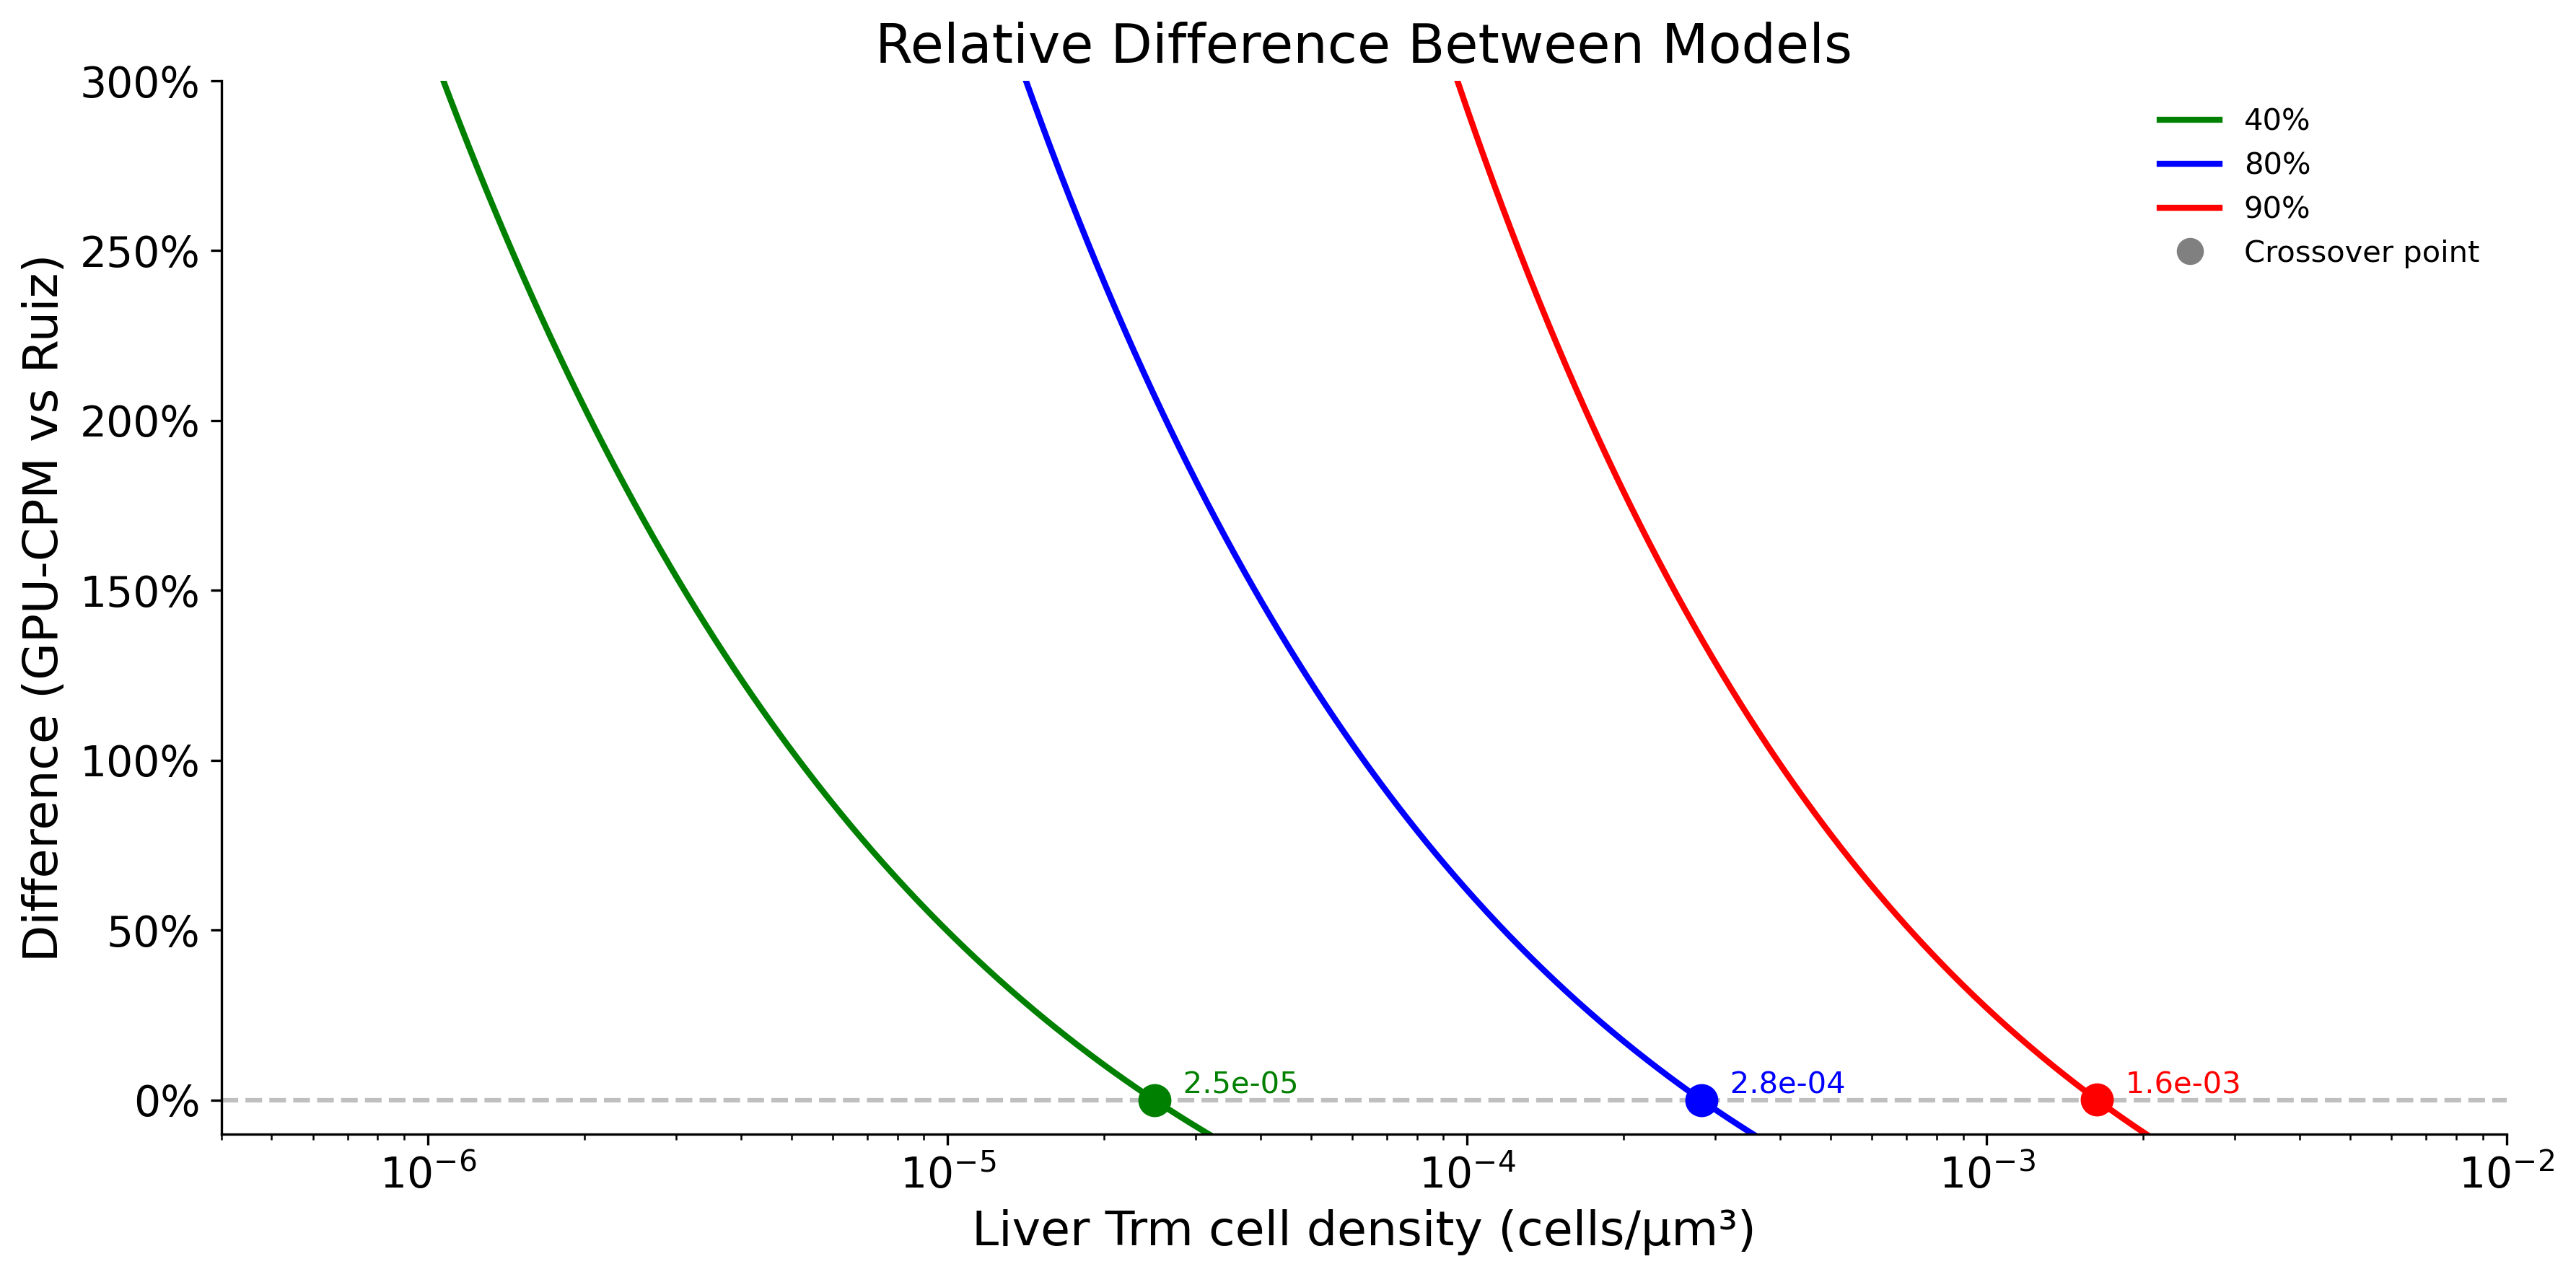

In [ ]:
# ---  Visualization ---
plt.figure(figsize=(12, 6))

# Use same colors as first plot
colors = ['green', 'blue', 'red']

# Explicit x-range matching first plot
x_plot = np.logspace(np.log10(4e-7), np.log10(1e-2), 1000)

for i, threshold in enumerate(coverage_thresholds):
    # Get additive model predictions 
    if threshold == 40:
        current_intercept = intercept
    elif threshold == 80:
        current_intercept = intercept + coef_80
    elif threshold == 90:
        current_intercept = intercept + coef_90
    
    log_add_pred = current_intercept + slope * np.log(x_plot)
    y_add_pred = np.exp(log_add_pred)
    
    # Get Ruiz predictions 
    ruiz_fit = curve_fit(power_law, 
                        ruiz_data[threshold]['x'], 
                        ruiz_data[threshold]['y'])
    y_ruiz_pred = power_law(x_plot, *ruiz_fit[0])
    
    # Calculate percentage differences (as fraction, not %)
    percent_diff = (y_add_pred - y_ruiz_pred) / y_ruiz_pred
    
    # Plot with same style as first plot
    plt.plot(x_plot, percent_diff, '-', color=colors[i],
             linewidth=2,
             label=f'{threshold}% coverage')
    
    # Find and mark crossover point (where difference=0)
    crossover_idx = np.argmin(np.abs(percent_diff))
    if percent_diff[crossover_idx] < 0.05:  # Only mark if truly close to zero
        plt.scatter(x_plot[crossover_idx], percent_diff[crossover_idx], 
                   color=colors[i], marker='o', s=100, zorder=5)
        # put on top of line
        plt.text(x_plot[crossover_idx], percent_diff[crossover_idx], 
                f'   {x_plot[crossover_idx]:.1e}', 
                ha='left', va='bottom', color=colors[i])

# Formatting to match first plot
plt.xscale('log')
plt.xlim(4e-7, 1e-2)
plt.ylim(-0.1, 3)  

# Add horizontal line at zero
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)

plt.xlabel('Liver Trm cell density (cells/μm³)', fontsize=16)
plt.ylabel('Difference (GPU-CPM vs Ruiz)', fontsize=16)
plt.title('Relative Difference Between Models', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

# Legend matching first plot's style
legend_elements = [
    Line2D([0], [0], color='green', lw=2, label='40%'),
    Line2D([0], [0], color='blue', lw=2, label='80%'),
    Line2D([0], [0], color='red', lw=2, label='90%'),
    Line2D([0], [0], marker='o', color='gray', label='Crossover point',
           linestyle='', markersize=8)
]
plt.legend(handles=legend_elements, frameon=False)

# Remove top/right spines to match first plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gcf().set_dpi(300)
plt.tight_layout()

plt.show()

/tmp/ipykernel_3026285/1381504382.py:14: RuntimeWarning: overflow encountered in power
  return a * x**b
/tmp/ipykernel_3026285/3760047509.py:22: OptimizeWarning: Covariance of the parameters could not be estimated
  ruiz_fit = curve_fit(power_law,


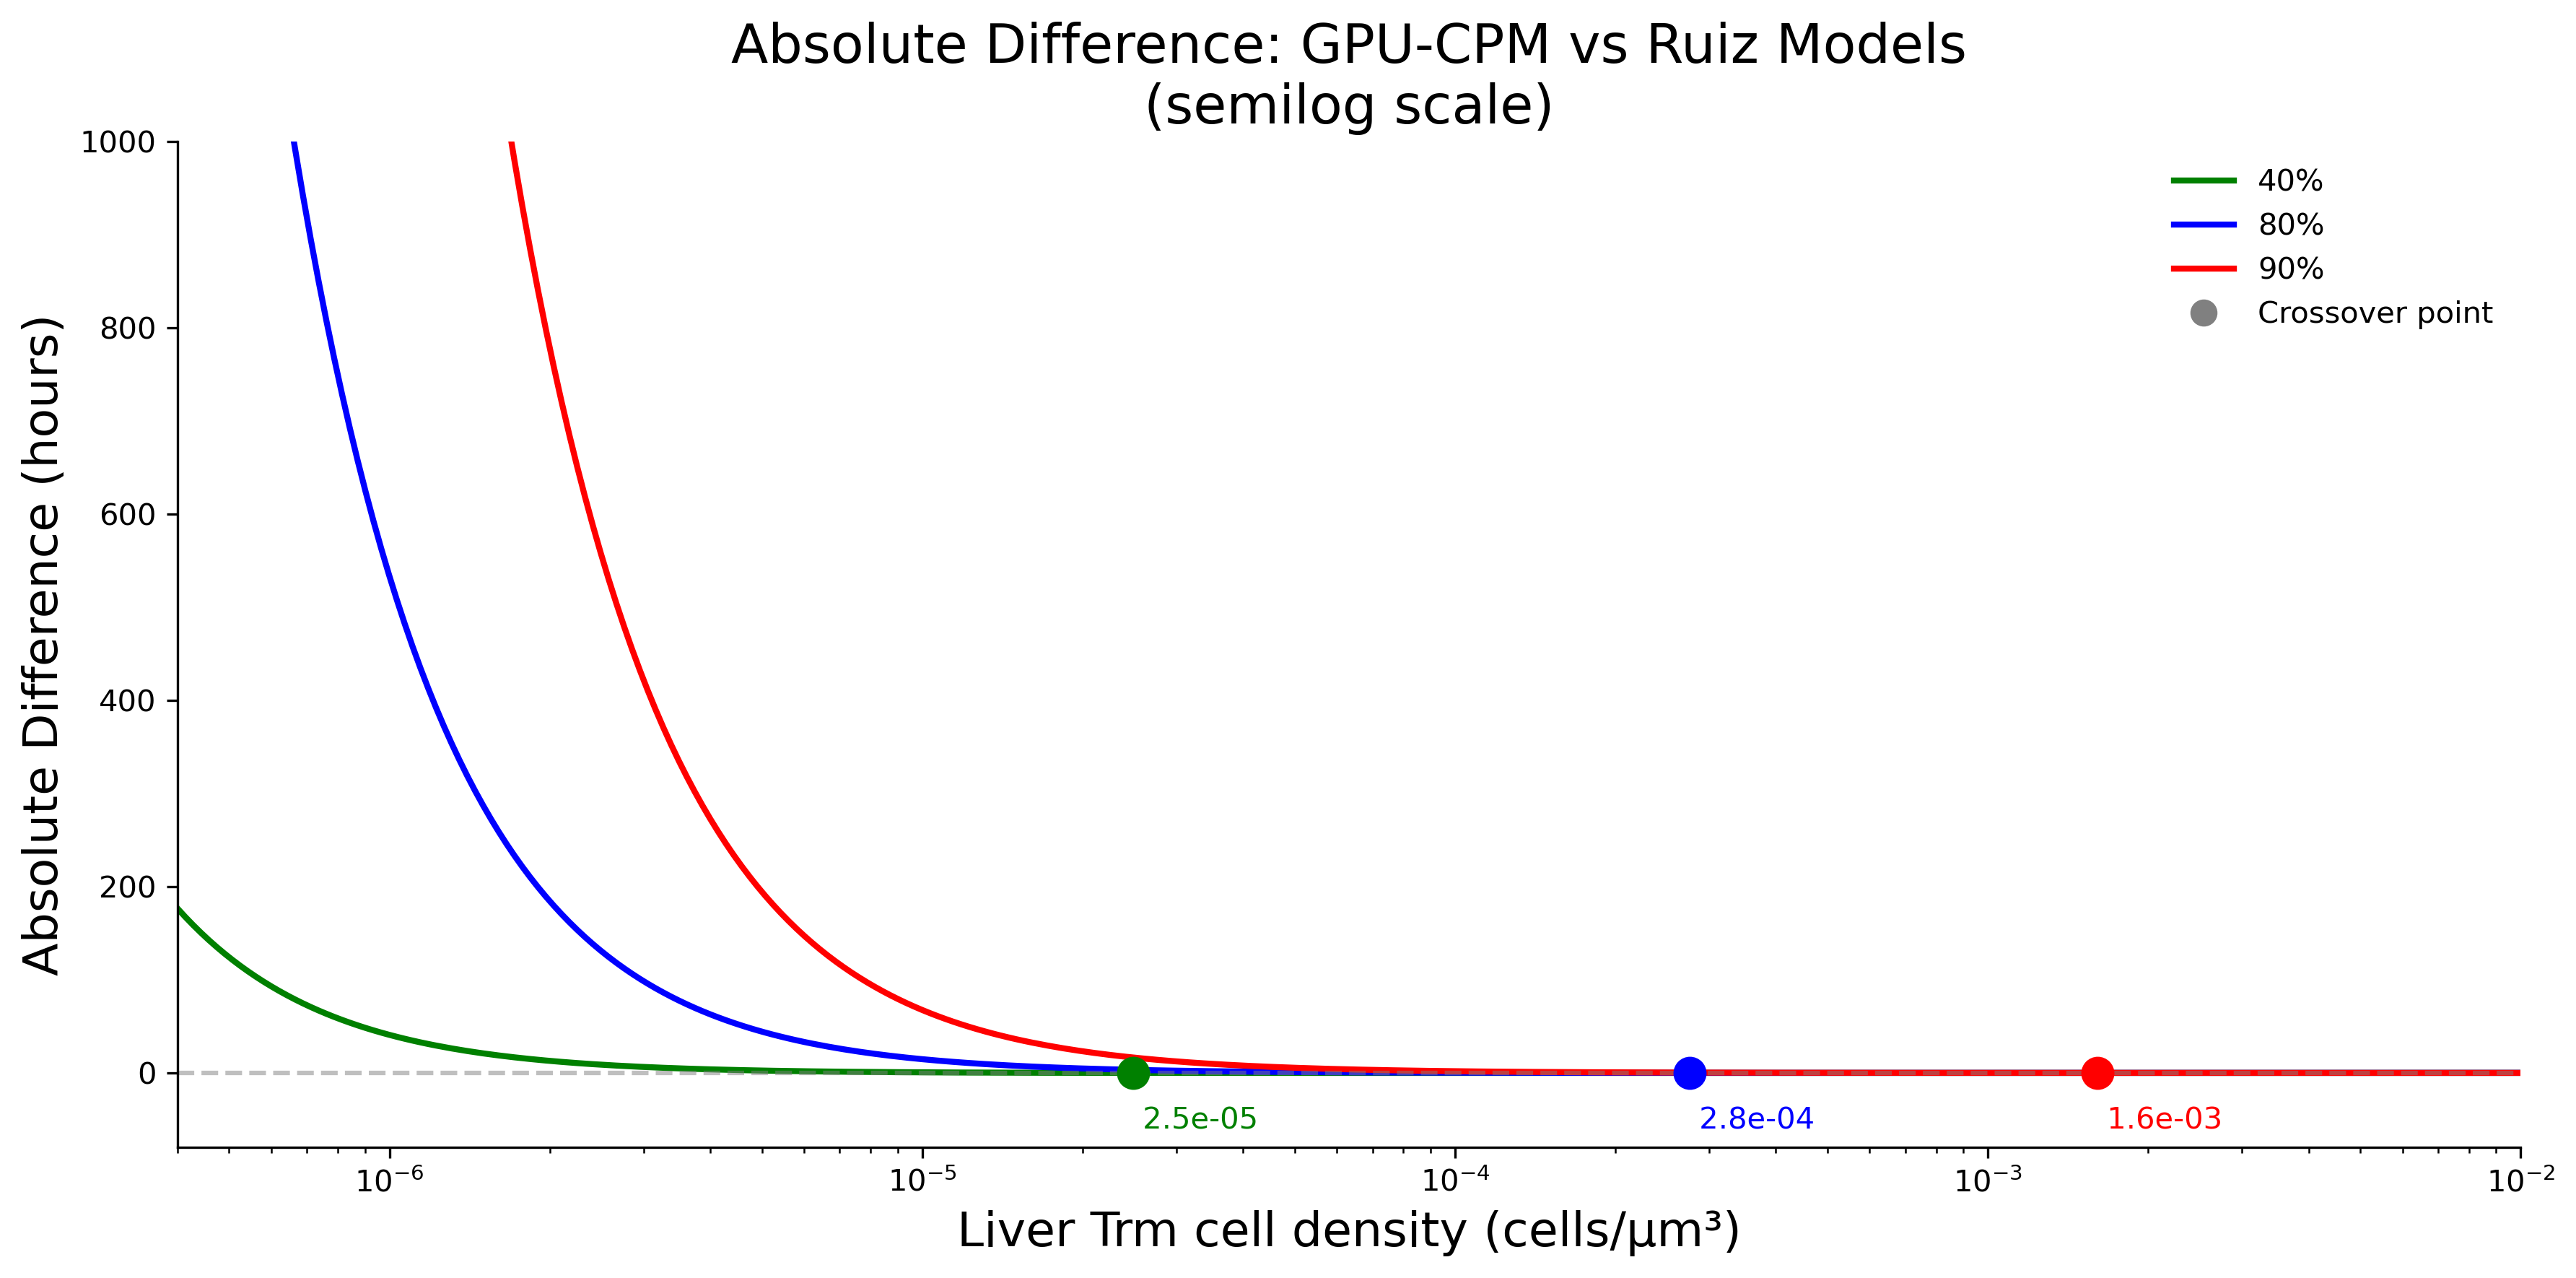

In [ ]:
# ---Absolute Differences ---
plt.figure(figsize=(12, 6))

# Use same colors as first plot
colors = ['green', 'blue', 'red']

# Adjusted x-range to focus on biologically relevant densities
x_plot = np.logspace(np.log10(4e-7), np.log10(1e-2), 300)  # More focused range

for i, threshold in enumerate(coverage_thresholds):
    # Get model predictions (same as before)
    if threshold == 40:
        current_intercept = intercept
    elif threshold == 80:
        current_intercept = intercept + coef_80
    elif threshold == 90:
        current_intercept = intercept + coef_90
    
    log_add_pred = current_intercept + slope * np.log(x_plot)
    y_add_pred = np.exp(log_add_pred)
    
    ruiz_fit = curve_fit(power_law, 
                        ruiz_data[threshold]['x'], 
                        ruiz_data[threshold]['y'])
    y_ruiz_pred = power_law(x_plot, *ruiz_fit[0])
    
    # Absolute differences in hours
    abs_diff = y_add_pred - y_ruiz_pred
    
    # Plot with log x and linear y (semilog)
    plt.plot(x_plot, abs_diff, '-', color=colors[i],
             linewidth=2,
             label=f'{threshold}% coverage')
    
    # Improved crossover point detection
    sign_change_idx = np.where(np.diff(np.sign(abs_diff)))[0]
    if len(sign_change_idx) > 0:
        crossover_idx = sign_change_idx[0]
        crossover_x = x_plot[crossover_idx]
        plt.scatter(crossover_x, 0, color=colors[i], 
                   marker='o', s=100, zorder=5)
        plt.text(crossover_x, 0, 
                f' \n {crossover_x:.1e}', 
                ha='left', va='top', color=colors[i])

plt.xscale('log')
plt.xlim(4e-7, 1e-2)  # More biologically relevant range
plt.ylim(-80, 1000)    # Better range for absolute differences

plt.axhline(0, color='gray', linestyle='--', alpha=0.5)

plt.xlabel('Liver Trm cell density (cells/μm³)', fontsize=16)
plt.ylabel('Absolute Difference (hours)', fontsize=16)
plt.title('Absolute Difference: GPU-CPM vs Ruiz Models\n(semilog scale)', fontsize=18)

plt.legend(handles=legend_elements, frameon=False)

# Clean spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gcf().set_dpi(300)
plt.tight_layout()
plt.show()